# Class project grade analysis

While grading a class project, I got the feeling that students who chose to use a comic format were having a much harder time demonstrating knowledge and meeting the grading criteria than students who chose to use an essay format. I decided to do a permutation test to determine whether or not the distribution of scores were actually distinct so that I could make an informed decision about whether I needed to adjust my grading.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

I recorded each student's score along with the format they chose and their class (two periods did this project)

In [2]:
df = pd.read_csv("Projects.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 4 columns):
Student    48 non-null int64
Class      48 non-null object
Grade      47 non-null float64
Format     47 non-null object
dtypes: float64(1), int64(1), object(2)
memory usage: 1.6+ KB


One student had not yet submitted the assignment, so I needed to drop their information.

In [4]:
df.dropna(inplace=True)

In [5]:
df.groupby("Format").count()

,Student,Class,Grade
Format,,,
comic,16,16,16
diary,9,9,9
essay,14,14,14
poem,1,1,1
story,1,1,1
video,6,6,6


Two students did unique formats, so I dropped their information as well.

In [6]:
df = df.drop(df[df.Format=="poem"].index)
df = df.drop(df[df.Format=="story"].index)

The permutation test combines data from two sets of students and splits it back into two random groupings. It is a way to analyze the likelihood that two sets of data really come from the same distribution. My permuttest function performs this analysis, prints the p-value for getting a difference in means as extreme as was seen, and plots a histogram of the difference of means seen during the simulation (which are also returned).

In [7]:
def permuttest(series1, series2, size=10000):
    """Does a permutation test to compute difference in means between size iterations of a permutation test. Returns array of dif. of means"""
    true_diff = np.mean(series1)-np.mean(series2)
    concatarray = np.concatenate((np.array(series1), np.array(series2)))
    diff_means = np.empty(size)
    for i in range(size):
        permuted = np.random.permutation(concatarray)
        s1 = permuted[:len(series1)]
        s2 = permuted[len(series1):]
        diff_means[i]=np.mean(s1)-np.mean(s2)
    p = sum(np.abs(diff_means)>=true_diff)/size
    print('p-value: {}'.format(p))
    plt.hist(diff_means)
    plt.xlabel("Difference of means")
    plt.ylabel("Frequency")
    plt.axvline(x=true_diff, color="r");
    return diff_means

The two class periods did not seem to be very different.

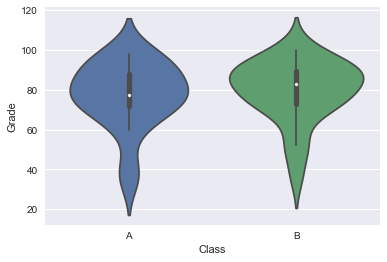

Class
A    77.227273
B    79.391304
Name: Grade, dtype: float64

In [8]:
sns.violinplot(x="Class", y="Grade", data=df)
plt.show()
df["Grade"].groupby(df["Class"]).mean()

p-value: 1.0


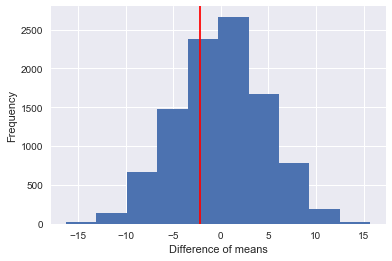

In [9]:
a=df[df.Class=="A"]["Grade"]
b=df[df.Class=="B"]["Grade"]
diff_means = permuttest(a,b)

When I grouped by project format, it seemed like there might be some differences between the formats. The majority of students did either a comic or an essay, and it seemed like the essay writers generally scored better than the comic writers.
Although the number of data points in each of these graphs is small and might be better suited for a swarm plot rather than a violin plot, I am keeping it as a violin plot to better maintain the privacy of the students' scores.

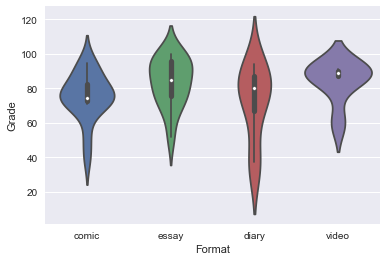

Mean grades for each format:
Format
comic    75.312500
diary    71.666667
essay    83.500000
video    84.333333
Name: Grade, dtype: float64

Median grades for each format:
Format
comic    74.5
diary    80.0
essay    85.0
video    89.0
Name: Grade, dtype: float64


In [10]:
sns.violinplot(x="Format", y="Grade", data=df)
plt.show()
print("Mean grades for each format:")
print(df["Grade"].groupby(df["Format"]).mean())
print("\nMedian grades for each format:")
print(df["Grade"].groupby(df["Format"]).median())

The average comic scored 8 points less than the average essay.

In [12]:
e=df[df.Format=="essay"]["Grade"]
c=df[df.Format=="comic"]["Grade"]
essay_comic_dif = np.mean(e)-np.mean(c)
print(essay_comic_dif)

8.1875


p-value: 0.1203


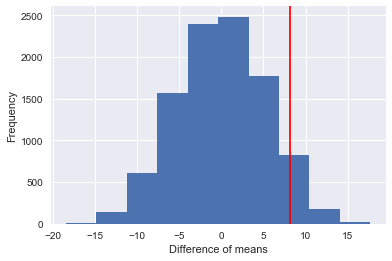

In [17]:
diff_means = permuttest(e,c)

In [18]:
np.percentile(diff_means, [2.5, 97.5])

array([-10.16071429,  10.0625    ])

Although it appeared that there might be a difference in the students' scores based on their format choice, it was not significant. 
I also tested the difference in the median scores, as there were a few outliers who brought down the mean scores. However, it was also not significant.

In [22]:
def permuttestmedian(series1, series2, size=10000):
    """Does a permutation test to compute difference in medians between size iterations of a permutation test. Returns array of dif. of medians"""
    true_diff = np.median(series1)-np.median(series2)
    concatarray = np.concatenate((np.array(series1), np.array(series2)))
    diff_medians = np.empty(size)
    for i in range(size):
        permuted = np.random.permutation(concatarray)
        s1 = permuted[:len(series1)]
        s2 = permuted[len(series1):]
        diff_means[i]=np.median(s1)-np.median(s2)
    p = sum(np.abs(diff_means)>=true_diff)/size
    print('p-value: {}'.format(p))
    plt.hist(diff_means)
    plt.xlabel("Difference of medians")
    plt.ylabel("Frequency")
    plt.axvline(x=true_diff, color="r");
    return diff_medians

p-value: 0.1099


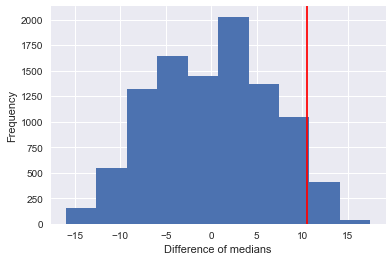

In [23]:
diff_medians = permuttestmedian(e,c)

Based on this analysis, I did not see a compelling reason to adjust some students scores based on their format. 